# Day 1

Scan depth

In [4]:
import graphviz
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re
import timeit

In [2]:
df = pd.read_csv('inputs/day1.txt', header=None)
x = df.iloc[:,0]

## Part one

Scan points

In [6]:
((x - x.shift(1).bfill()).values.flatten() > 0).sum() 

1832

## Part two

Scan with window

In [7]:
wx = x.rolling(window=3).sum().dropna()
((wx - wx.shift(1).bfill()).values.flatten() > 0).sum() 

1858

# Day 2

Move submarine, determine position

In [8]:
df = pd.read_csv('inputs/day2.txt', header=None, delimiter=' ')
df.columns = ['direction', 'val']
df.direction.unique()

array(['forward', 'down', 'up'], dtype=object)

## Part one

Control interpretation one

In [9]:
forward = df[df.direction == 'forward'].val.sum()
down = df[df.direction == 'down'].val.sum()
up = df[df.direction == 'up'].val.sum()
forward * (down-up)

1936494

## Part two

Control interpretation two

In [10]:
hori, aim, depth = 0, 0, 0
for cmd, val in df.values:
    if cmd == 'down':
        aim += val
    if cmd == 'up':
        aim -= val
    if cmd == 'forward':
        hori += val
        depth += aim*val
hori*depth

1997106066

# Day 3

Decode sensors

In [11]:
# Load
df = pd.read_csv('inputs/day3.txt', header=None, names=['raw'], dtype={'raw': str})
#n_bits = df.raw
n_bits = df.raw.str.len().unique()[0]
print(f'n_bits = {n_bits}')
df.head()

n_bits = 12


,raw
0,111100101100
1,101100110001
2,100110100101
3,001101100010
4,010111011110


## Part one

Mask bits

In [12]:
gamma_str = "".join([
    str(int(df.raw.str.slice(start=i, stop=i+1).astype(int).sum() > len(df) / 2))
    for i in range(n_bits)
])
gamma = int(gamma_str, 2)
epsilon_str = "".join(['1' if s == '0' else '0' for s in gamma_str])
epsilon = int(epsilon_str, 2)
print(f'{gamma_str} => {gamma}')
print(f'{epsilon_str} => {epsilon}')
print(f'result = {gamma} * {epsilon} = {gamma * epsilon}')

000011011010 => 218
111100100101 => 3877
result = 218 * 3877 = 845186


## Part two

Filter bits

In [13]:
oxy = df.copy()
i = 0
while len(oxy) > 1:
    most_common = str(int(oxy.raw.str.slice(start=i, stop=i+1).astype(int).sum() >= len(oxy) / 2))
    oxy = oxy[oxy.raw.str.slice(start=i, stop=i+1) == most_common]
    i = (i + 1) % n_bits
oxy_rating_str = oxy.raw.values[0]
oxy_rating = int(oxy_rating_str, 2)

co2 = df.copy()
i = 0
while len(co2) > 1:
    most_common = str(int(co2.raw.str.slice(start=i, stop=i+1).astype(int).sum() < len(co2) / 2))
    co2 = co2[co2.raw.str.slice(start=i, stop=i+1) == most_common]
    i = (i + 1) % n_bits
co2_rating_str = co2.raw.values[0]
co2_rating = int(co2_rating_str, 2)

print(f'{oxy_rating_str} => {oxy_rating}')
print(f'{co2_rating_str} => {co2_rating}')
print(f'life support rating = {oxy_rating} * {co2_rating} = {oxy_rating * co2_rating}')

010110110011 => 1459
110001101010 => 3178
life support rating = 1459 * 3178 = 4636702


# Day 4

Play bingo

In [14]:
# Load data
with open('inputs/day4.txt') as fi:
    lines = fi.readlines()
len(lines)

def get_boards(lines):
    rows = []
    for line in lines:
        line = line.strip()
        if not line: continue
        rows.append([int(s) for s in line.split()])
        if len(rows) == 5:
            yield np.array(rows)
            rows = []

all_draws = [int(s) for s in lines[0].strip().split(',')]
boards = list(get_boards(lines[1:]))

print(all_draws)
print(boards[0])
print(boards[0].T)

[26, 38, 2, 15, 36, 8, 12, 46, 88, 72, 32, 35, 64, 19, 5, 66, 20, 52, 74, 3, 59, 94, 45, 56, 0, 6, 67, 24, 97, 50, 92, 93, 84, 65, 71, 90, 96, 21, 87, 75, 58, 82, 14, 53, 95, 27, 49, 69, 16, 89, 37, 13, 1, 81, 60, 79, 51, 18, 48, 33, 42, 63, 39, 34, 62, 55, 47, 54, 23, 83, 77, 9, 70, 68, 85, 86, 91, 41, 4, 61, 78, 31, 22, 76, 40, 17, 30, 98, 44, 25, 80, 73, 11, 28, 7, 99, 29, 57, 43, 10]
[[57 12 60 96 93]
 [73 87 63 70 91]
 [74 32 43 67 46]
 [59 34  5 35 82]
 [53 40 55 29  1]]
[[57 73 74 59 53]
 [12 87 32 34 40]
 [60 63 43  5 55]
 [96 70 67 35 29]
 [93 91 46 82  1]]


## Part one

Find first board to win

In [15]:
def check_full(row, draws):
    measure = set(row).difference(draws)
    return len(measure) == 0
    

def find_board(boards, all_draws):
    for round_i in range(len(all_draws)):
        draw = all_draws[round_i]
        draws = all_draws[:round_i+1]
        for board_i, board in enumerate(boards):
            for row in np.vstack([board, board.T]):
                if check_full(row, draws):
                    return draw, draws, board, board_i, row


draw, draws, board, board_i, row = find_board(boards, all_draws)
unmarked = list(set(board.flatten()).difference(draws))
print(f'Board = {board_i}')
print(board)
print(f'Draws = [{draw}], {draws}')
print(f'Unmarked = {unmarked}')


score = np.array(unmarked).sum() * draw
print(f'Score = {score}')

Board = 43
[[ 8 32 94 72 74]
 [27 29 22  2 76]
 [58 54 80  5 35]
 [36 24 83 59 25]
 [21 31 48 39  4]]
Draws = [94], [26, 38, 2, 15, 36, 8, 12, 46, 88, 72, 32, 35, 64, 19, 5, 66, 20, 52, 74, 3, 59, 94]
Unmarked = [4, 76, 80, 83, 21, 22, 24, 25, 27, 29, 31, 39, 48, 54, 58]
Score = 58374


## Part two

Find last board to win

In [16]:
def check_full(row, draws):
    measure = set(row).difference(draws)
    return len(measure) == 0
    

def find_board(boards, all_draws):
    remain = np.ones(len(boards))
    for round_i in range(len(all_draws)):
        draw = all_draws[round_i]
        draws = all_draws[:round_i+1]
        for board_i, board in enumerate(boards):
            for row in np.vstack([board, board.T]):
                if check_full(row, draws):
                    remain[board_i] = 0
            if remain.sum() == 0:
                return draw, draws, board, board_i, row

draw, draws, board, board_i, row = find_board(boards, all_draws)
unmarked = list(set(board.flatten()).difference(draws))
print(f'Board = {board_i}')
print(board)
print(f'Winning row = {row}')
print(f'Draws = [{draw}], {draws}')
print(f'Unmarked = {unmarked}')


score = np.array(unmarked).sum() * draw
print(f'Score = {score}')

Board = 16
[[41 99 93 62 96]
 [90 30 10  5 94]
 [98 32 83 78 25]
 [76 27 29 19 35]
 [58 91 34 31  3]]
Winning row = [96 94 25 35  3]
Draws = [31], [26, 38, 2, 15, 36, 8, 12, 46, 88, 72, 32, 35, 64, 19, 5, 66, 20, 52, 74, 3, 59, 94, 45, 56, 0, 6, 67, 24, 97, 50, 92, 93, 84, 65, 71, 90, 96, 21, 87, 75, 58, 82, 14, 53, 95, 27, 49, 69, 16, 89, 37, 13, 1, 81, 60, 79, 51, 18, 48, 33, 42, 63, 39, 34, 62, 55, 47, 54, 23, 83, 77, 9, 70, 68, 85, 86, 91, 41, 4, 61, 78, 31]
Unmarked = [98, 99, 10, 76, 25, 29, 30]
Score = 11377


## Day 5

Hydrothermal vents

In [216]:
with open('inputs/day5.txt') as fi:
    lines = np.array([
        [int(s) for s in re.match(r'^(\d+),(\d+) -> (\d+),(\d+)$', line).groups()]
         for line in fi.readlines()])

## Analysis

In [217]:
lines.min(), lines.max()

(10, 990)

## Part one

- Interpolate between end points using np.linspace
- Add lines together in matrix. 
- Values > 1 correspond to intersections. 
- Only horizontal and vertical lines.

In [218]:
def interpolate(x1, y1, x2, y2):
    if x1 == x2:
        # vertical case
        n_steps = abs(y1-y2) + 1
        return [(x1, y) for y in np.linspace(y1, y2, n_steps).astype(int)]
    elif y1 == y2:
        # horizontal case
        n_steps = abs(x1-x2) + 1
        return [(x, y1) for x in np.linspace(x1, x2, n_steps).astype(int)]
    else:
        # slanted case
        n_steps = min(abs(x1 - x2)+1, abs(y1-y2)+1)
        return list(zip(
            np.linspace(x1,x2, n_steps),#.astype(int),
            np.linspace(y1,y2, n_steps)#.astype(int)
        ))
    
    
def intersections(lines):
    dim = lines.max()+1
    grid = np.zeros((dim,dim))
    for line in lines:
        for x,y in interpolate(*line):
            #print(x,y)
            assert x == int(x) and y == int(y)
            grid[int(x)][int(y)] += 1
    return grid.astype(int)

[[491 392  34 392]
 [337  52 485  52]
 [256 605 256 959]
 [399 193 598 193]
 [ 79 450 569 450]] ...
Result = 6856


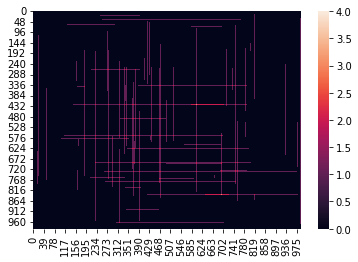

In [219]:
test_lines = lines[(lines[:,0] == lines[:,2]) | (lines[:,1] == lines[:,3])]
print(test_lines[:5], '...')
grid = intersections(test_lines)
sns.heatmap(grid.T)

print(f'Result = {len(grid[grid > 1].flatten())}')
# Result = 6822 wrong

## Part two

Can reuse the intersections function, because it was general to begin with.

Result = 20666


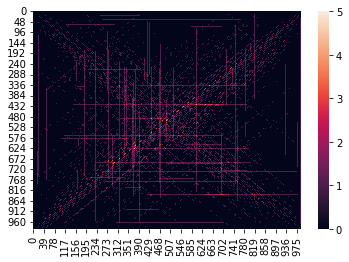

In [222]:
test_lines = lines
grid = intersections(test_lines)
sns.heatmap(grid.T)

print(f'Result = {len(grid[grid > 1].flatten())}')

## Day 6

Predict growth of fish population

In [469]:
with open('inputs/day6.txt') as fi:
    fish = np.array([int(s) for s in fi.read().strip().split(',')])
print(np.unique(fish))
fish

[1 2 3 4 5]


array([1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 4, 1, 5, 1, 3,
       1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 5, 2, 5, 1, 1, 2, 1, 1, 1, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 5, 4, 1,
       1, 1, 1, 1, 5, 1, 2, 4, 1, 1, 1, 1, 1, 3, 3, 2, 1, 1, 4, 1, 1, 5,
       5, 1, 1, 1, 1, 1, 2, 5, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 3, 1, 1, 3, 1, 3, 1, 4, 1, 5, 4, 1, 1, 2, 1, 1, 5,
       1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 5, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 2, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 2, 1, 4, 1, 5, 1, 1, 1, 4, 5, 1, 1, 1, 1, 1, 1, 5, 1, 1,
       5, 1, 2, 1, 1, 2, 4, 1, 1, 2, 1, 5, 5, 3])

## Part one

Exponential, but short horison. Naive simulator will work.

In [470]:
def sim_naive(pop, days=1):
    # will use a lot of memory if days is large!
    pop = np.array(pop)  # copy initial population
    for i in range(days):
        #if i % 10 == 0: print(f'Day {i}')
        n_reset = len(pop[pop == 0])
        pop = np.concatenate([
            pop[pop == 0] + 6,  # reset fish
            pop[pop > 0] - 1,  # decremented fish
            pop[pop == 0] + 8, # new fish
        ])
    return len(pop)

In [473]:
result = sim_naive(fish, days=80)
print(f'Result = {result}')

Result = 395627


## Part two

Keep an array of counters for each timer value. Roll values left each day.

In [474]:
def fast_sim(pop, days=10):
    counters = np.zeros(9).astype(int)
    for t in pop: counters[t] += 1
    for _ in range(days):
        n_spawns = counters[0]
        counters = np.roll(counters, -1)
        counters[8] = n_spawns
        counters[6] += n_spawns
    return sum(counters)
    
print(f'Result = {fast_sim(fish, days=256)}')

Result = 1767323539209


# Day 7

Crab fuel

In [503]:
with open('inputs/day7.txt') as fi:
    pos = np.array([int(s) for s in fi.read().strip().split(',')])
print(len(pos))

1000


## Part one

Constant fuel burn. I was initially surprised that the mean does not work. 

Why mean does not work. Imagine that you have :
- 9 crabs on position 0
- 1 crab on position 10
- The mean position is 1, so 9 crabs move 1 and 1 crab moves 9 (18 total)
- Better that 1 crab at position 10 moves 10 steps to position 0 (10 total)  


Mean crab position = 460.574
Optimal crab position: 342
Optimal fuel cost: 325528


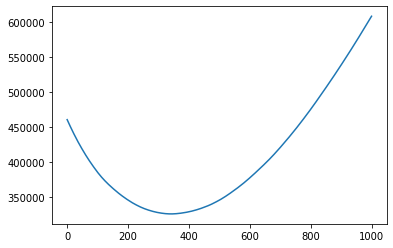

In [514]:
n_targets = range(len(pos))
fuel_costs = [np.abs(pos - target).sum() for target in n_targets]
sns.lineplot(x=targets, y=fuel_costs)
print(f'Mean crab position = {pos.mean()}')
opt_target = np.argmin(fuel_costs)
print(f'Optimal crab position: {opt_target}')
print(f'Optimal fuel cost: {fuel_costs[opt_target]}')

## Part two

Increasing fuel burn. Surprisingly, the mean almost works.

Mean crab position = 460.574
Optimal crab position: 460
Optimal fuel cost: 85015836


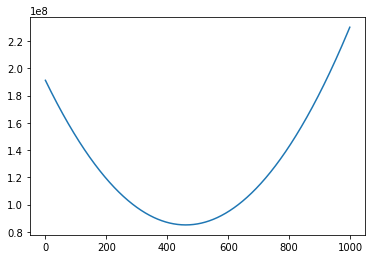

In [526]:
def cost(pos, target):
    dist = np.abs(pos - target)
    return dist*(dist+1)/2

vcost = np.vectorize(cost)

fuel_costs = [vcost(pos, target).sum() for target in n_targets]
sns.lineplot(x=targets, y=fuel_costs)
print(f'Mean crab position = {pos.mean()}')
opt_target = np.argmin(fuel_costs)
print(f'Optimal crab position: {opt_target}')
print(f'Optimal fuel cost: {fuel_costs[opt_target].astype(int)}')

# Day 8

Descramble the digital display (mixed wires)

In [531]:
with open('inputs/day8.txt') as fi:
    lines = fi.readlines()
for line in lines[:3]:
    print(line.strip())
print('...')

badc bd dbeaf cfdbge dfb cfbdea efbag edcfgab dcafe degfca | eacfd acdfbe cbdegf fcbaedg
cd fdbac egcfab gbadcfe cfgdeb cbadfe deca cdf dfabg abefc | dcf cfbad gbafced fcd
cg agecfb cbg eabgfdc egdc fdgba bafecd cbdfe bfcdeg cfgdb | efdcb adcfeb fbdcg gbc
...


## Part one

2, 3, 4 and 7 are uniquely identifiable. So easy peasy.

In [542]:
# chop off entries (left) part and only keep output (right) part
outputs = np.array([line.split('| ')[1].strip().split() for line in lines]).flatten()
# map output to lengths
lens = pd.Series([len(s) for s in outputs])
# count occurences of 2, 3, 4, and 7 lengths, corresponding to digits 1, 4, 7 and 8
print(f'Number of 1s, 4s, 7s and 8s in output = {lens.isin([2,4,3,7]).sum()}')

Number of 1s, 4s, 7s and 8s in output = 387


## Part two

Time to call Sherlock...

```
 aaaa
b    c
b    c
 dddd
e    f
e    f
 gggg

```

In [549]:
digits = {
    0: 'abcefg',
    1: 'cf',
    2: 'acdeg',
    3: 'acdfg',
    4: 'bcdf',
    5: 'abdfg',
    6: 'abdefg',
    7: 'acf',
    8: 'abcdefg',
    9: 'abcdfg'
}

In [550]:
def splitline(line):
    entries, outputs = line.strip().split(' | ')
    entries = entries.split()
    outputs = outputs.split()
    return entries, outputs
    
def decode(entries, output):
    return num

splitlines = [splitline(line) for line in lines]
splitlines[0]
# bd -> cf
# dfb -> acf
# badc -> bcdf
# ac -> bd
# 
# f -> a, because acf-cf = a
# 

(['badc',
  'bd',
  'dbeaf',
  'cfdbge',
  'dfb',
  'cfbdea',
  'efbag',
  'edcfgab',
  'dcafe',
  'degfca'],
 ['eacfd', 'acdfbe', 'cbdegf', 'fcbaedg'])

# Day 9

The cave of low points and basins

In [713]:
with open('inputs/day9.txt') as fi:
    a = np.array([
        [float(s)
        for s in line.strip()]
        for line in fi.readlines()
    ])
    ex = np.array([
        [2,1,9,9,9,4,3,2,1,0],
        [3,9,8,7,8,9,4,9,2,1],
        [9,8,5,6,7,8,9,8,9,2],
        [8,7,6,7,8,9,6,7,8,9],
        [9,8,9,9,9,6,5,6,7,8]
    ])

## Part one

Create an infinite boundary around array. Makes it easier to find low points.

In [70]:
def make_edge(src, fill=np.inf):
    # create slightly larger array
    m = np.full((src.shape[0]+2, src.shape[1]+2), -1.0)
    # copy original array to middle
    m[1:-1,1:-1] = src[:]
    # copy fill value to edges
    m[1:-1,0] = fill # left side
    m[1:-1,-1] = fill # right side
    m[0,:] = fill # top
    m[-1,:] = fill # bottom, from self
    return m.astype(type(fill))

def find_lowpoints(a):
    b = make_edge(a)
    return a < np.min([
        b[1:-1,0:-2], # left
        b[1:-1,2:],   # right
        b[0:-2,1:-1], # top
        b[2:,1:-1], # bottom  
    ], axis=0)

In [737]:
np.sum(a[find_lowpoints(a)]+1)

518.0

## Part two

Use a stack for depth-first search from low points to trace basins

In [776]:
def trace_basins(a):
    """
    Use depth-first search to trace basins
    """
    world = make_edge(a, fill=9)
    lows = find_lowpoints(world)
    low_locs = np.where(lows)
    basins = []
    for low in zip(*low_locs):
        #print('Begin trace')
        stack = [low]  # push x,y on stack 
        basin = [low]  # basin members added on push
        while stack:
            x, y = stack.pop()
            for h,v in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                neighbor = (x+h, y+v)
                if neighbor not in basin and world[neighbor] != 9:
                    stack.append(neighbor)
                    basin.append(neighbor)
        basins.append(basin)
        #print(f'Basin searched for low at {low}. Size = {len(basin)}')
    return basins

#traces = trace_basins(ex)
traces = trace_basins(a)
np.prod(sorted([len(b) for b in traces])[::-1][:3])

949905

# Day 10

Syntax checker

In [778]:
with open('inputs/day10.txt') as fi:
    lines = [line.strip() for line in fi.readlines()]

## Part one

Use a stack. Read line from left to right and use a stack of characters to keep track of balance
- push on left-char
- pop-and-check on right-char

In [795]:
syntax_points = {')': 3, ']': 57, '}': 1197, '>': 25137}
LEFT_CHARS = '([{<'
RIGHT_CHARS = ')]}>'

def syntax_check(lines):
    errors = []

    for line_num, line in enumerate(lines):
        stack = []
        for c in line:
            if c in LEFT_CHARS:
                # push on stack
                stack.append(c)
            elif c in right_chars:
                popped = stack.pop()
                if LEFT_CHARS.index(popped) != RIGHT_CHARS.index(c):
                    errors.append((line_num, c))
                    break
            else:
                raise Exception(f'Invalid character on line {line_num}: {c}')
    return errors

errors = syntax_check(lines)
total_error = sum([syntax_points[c] for line_num, c in errors])
print(f'Total error: {total_error}')

Total error: 345441


## Part two

- Again use a stack, but a little differently this time
- The two functions can probably be combined into one
- Use np.median to find median

In [800]:
completion_points = {
    ')': 1,
    ']': 2,
    '}': 3,
    '>': 4,
}
    
def autocomplete(lines):
    lines_with_errors = {line_num for line_num, _ in syntax_check(lines)}
    all_completions = []
    for line_num, line in enumerate(lines):
        if line_num in lines_with_errors: continue
        stack = []
        for c in line:
            if c in LEFT_CHARS:
                # push on stack
                stack.append(c)
            elif c in RIGHT_CHARS:
                stack.pop()
            else:
                raise Exception(f'Invalid character on line {line_num}: {c}')
        # reverse stack and translate left -> corresponding right
        completions = [RIGHT_CHARS[LEFT_CHARS.index(c)] for c in stack[::-1]]
        all_completions.append(completions)
    return all_completions

def score_completion(completion):
    total_score = 0
    for c in completion:
        total_score *= 5
        total_score += completion_points[c]
    return total_score
        
scores = [score_completion(completion) for completion in autocomplete(lines)]
print(f'Median score: {np.median(scores).astype(int)}')

Median score: 3235371166


# Day 11

A cellular automaton

In [196]:
with open('inputs/day11.txt') as fi:
    init = np.array(
        [
            [int(s) for s in line.strip()]
            for line in fi.readlines()
        ]
    ) 
    
def compact(a):
    return "\n".join([
        "".join([str(v) if v<10 else '*' for v in row])
        for row in a
    ])

print(compact(init))

5651341452
1381541252
1878435224
6814831535
3883547383
6473548464
1885833658
3732584752
1881546128
5121717776


In [213]:
def cellular(init, steps=1):
    state = init
    for i in range(steps):
        # STEP 1
        state = state + 1
        # STEP 2
        flashed = state > 9
        x, y = np.where(flashed)
        while len(x):
            # for each 10+'er, increase square kernel by 1
            buffer = np.zeros(state.shape).astype(int)
            buffer = make_edge(buffer, fill=-np.inf)
            x += 1; y += 1  # compensate for edge
            buffer[x-1, y-1] += 1
            buffer[x,   y-1] += 1
            buffer[x+1, y-1] += 1
            buffer[x-1, y]   += 1
            buffer[x,   y]   += 1
            buffer[x+1, y]   += 1
            buffer[x-1, y+1] += 1
            buffer[x,   y+1] += 1
            buffer[x+1, y+1] += 1
            buffer = buffer[1:-1, 1:-1].astype(int)
            state += buffer
            x,y = np.where((state > 9) & (np.invert(flashed)))
            flashed = state > 9
        # STEP 3
        state[np.where(state > 9)] = 0
        state = state.astype(int)
        yield state

n_flashed = 0
for state in cellular(init, steps=100):
    n_flashed += len(state[state == 0])
print(f'Total flashed = {n_flashed}')

Total flashed = 1625


In [220]:
for step, state in enumerate(cellular(init, steps=1000)):
    if state.sum() == 0.0:
        print(f'First synchronous flash at step = {step+1}')
        break


First synchronous flash at step = 244


# Day 12

Path finding

{'bm': {'gq', 'XY', 'im', 'AF', 'QI', 'cj'}, 'XY': {'bm'}, 'ol': {'AF', 'start', 'ja', 'RD', 'JS'}, 'JS': {'ja', 'ol', 'start', 'gq'}, 'im': {'bm', 'QI', 'end', 'gq'}, 'RD': {'ja', 'ol', 'start', 'gq'}, 'QI': {'gq', 'im', 'bm', 'ja', 'end'}, 'ja': {'gq', 'QI', 'RD', 'ol', 'JS'}, 'gq': {'im', 'QI', 'bm', 'ja', 'RD', 'JS'}, 'end': {'QI', 'im', 'AF'}, 'AF': {'bm', 'ol', 'end'}, 'start': {'RD', 'ol', 'JS'}, 'cj': {'bm'}}


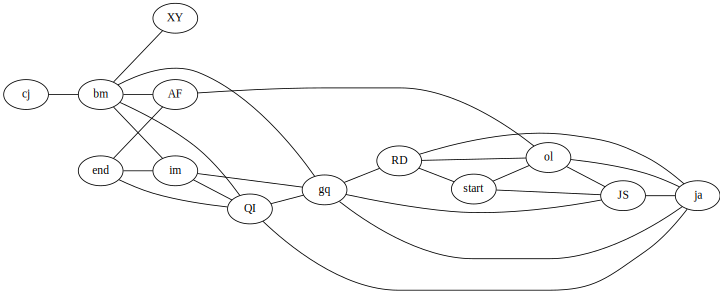

In [23]:
with open('inputs/day12.txt') as fi:
    edges = [l.strip().split('-') for l in fi.readlines()]
nbs = {} # neighbors dict
for u,v in edges:
    # it will add neighbors of end, but who cares
    nbs.setdefault(u, set()).add(v)
    nbs.setdefault(v, set()).add(u)
print(nbs)
g = graphviz.Graph('Cave System', graph_attr={'rankdir':'LR', 'size': '10'})
for e in edges:
    g.edge(e[0], e[1])
g

## Part one

Use stack to implement depth-first search pushing and popping path elements, e.g. `[v0, v1, ...]`.

In [34]:
init_path = ['start']
stack = [init_path]
found = []
while stack:
    path = stack.pop()
    last_vert = path[-1]
    for nb in nbs[last_vert]:
        extended = path + [nb]
        if nb == 'end':
            found.append(extended)
            continue
        if nb.isupper() or nb not in path:
            # push extended path
            stack.append(extended)
print(f'Found {len(found)} paths from start -> end')

Found 3887 paths from start -> end


## Part two

Can visit a single small cave twice, not including the start and end

In [36]:
init_path = ['start']
stack = [init_path]
found = []

def single_visit(path, nb):
    only_small = [v for v in path if v.islower()]
    return len(only_small) == len(set(only_small))

while stack:
    path = stack.pop()
    last_vert = path[-1]
    for nb in nbs[last_vert]:
        extended = path + [nb]
        if nb == 'start': continue
        if nb == 'end':
            found.append(extended)
            continue
        if nb.isupper() or nb not in path or single_visit(path, nb):
            # push extended path
            stack.append(extended)
print(f'Found {len(found)} paths from start -> end')

Found 104834 paths from start -> end


# Day 13

Use numpy's flip functions, i.e. np.flipud and np.fliplr along with some np.max

In [326]:
with open('inputs/day13.txt') as fi:
    x, y = [], []
    folds = []
    for line in fi.readlines():
        line = line.strip()
        if line == '':
            continue
        if line.startswith('fold'):
            segments = line.split(' ')
            dimension, place = segments[2].split('=')
            folds.append([dimension, int(place)])
            continue
        if line[0].isdigit():
            first, second = line.split(',')
            x.append(int(first))
            y.append(int(second))
    x = np.array(x)
    y = np.array(y)

print(f'x min = {x.min()}, x max = {x.max()}')
print(f'y min = {y.min()}, y max = {y.max()}')
for fold in folds:
    print(fold)
paper = np.zeros((x.max()+1, y.max()+2))
paper[x,y] = 1.0
print(f'There are {paper.sum().astype(int)} dots on the paper with dimensions {paper.shape}')

x min = 0, x max = 1310
y min = 1, y max = 893
['x', 655]
['y', 447]
['x', 327]
['y', 223]
['x', 163]
['y', 111]
['x', 81]
['y', 55]
['x', 40]
['y', 27]
['y', 13]
['y', 6]
There are 908 dots on the paper with dimensions (1311, 895)


## Part one

Fold paper along vertical line, i.e. first fold. Flip the "right" paper and compute max of two papers, when aligned right. 

In [327]:
dimension, place = folds[0]
print(f'Original paper shape = {paper.shape}')
print(f'Cut paper at {dimension} = {place}')
left, right = paper[:place, :], paper[place+1:, :]
print(f'Left paper shape = {left.shape}')
print(f'Right paper shape = {right.shape}')
print(f'Papers have same size: {left.shape == right.shape}')
print(f'Flipping "right" paper up/down, because numpy arrays grow downwards in x')
right = np.flipud(right)
print(f'Smushing papers together...')
smush = np.max([left, right], axis=0)
print(f'There are {smush.sum().astype(int)} dots on smushed paper')

Original paper shape = (1311, 895)
Cut paper at x = 655
Left paper shape = (655, 895)
Right paper shape = (655, 895)
Papers have same size: True
Flipping "right" paper up/down, because numpy arrays grow downwards in x
Smushing papers together...
There are 763 dots on smushed paper


## Part two
Do the same, but more times, and "print" the resulting ASCII art. Also, not simple folds with equal-sized sides.

In [329]:
smush = paper.copy()
print(f'Begin folding paper with shape {smush.shape}'); print()
for i, (dim, place) in enumerate(folds):
    print(f'Begin fold {i+1} at {dim} = {place}')
    if dim == 'x':
        first, second = smush[:place, :], smush[place+1:, :]
        second = np.flipud(second)
        if first.shape == second.shape:
            # simple case
            smush = np.max([first, second], axis=0)
        else:
            # advanced case
            if first.shape[0] < second.shape[0]:
                # swap
                temp = first
                first = second
                second = first            
            smush = first
            offset = first.shape[0] - second.shape[0]
            smush[offset:,:] += second
            smush = (smush > 1).astype(int)
    if dim == 'y':
        first, second = smush[:, :place], smush[:, place+1:]
        second = np.fliplr(second)
        if first.shape == second.shape:
            # simple case
            smush = np.max([first, second], axis=0)
        else:
            # advanced case
            if first.shape[1] < second.shape[1]:
                # swap
                temp = first
                first = second
                second = first
            smush = first
            offset = first.shape[1] - second.shape[1]
            smush[:,offset:] += second
            smush = (smush > 1).astype(int)
    print(f'- Smushed shapes {first.shape} <- {second.shape}')
    print(f'- Equal size? {first.shape == second.shape}')
    print(f'Smush now has shape {smush.shape} ...')
    print()
    
def show_code(smush):
    return "\n".join([
        "".join(['#' if v == 1 else '.' for v in row])
        for row in smush
    ])
    
print(show_code(np.flipud(smush.astype(int))))

Begin folding paper with shape (1311, 895)

Begin fold 1 at x = 655
- Smushed shapes (655, 895) <- (655, 895)
- Equal size? True
Smush now has shape (655, 895) ...

Begin fold 2 at y = 447
- Smushed shapes (655, 447) <- (655, 447)
- Equal size? True
Smush now has shape (655, 447) ...

Begin fold 3 at x = 327
- Smushed shapes (327, 447) <- (327, 447)
- Equal size? True
Smush now has shape (327, 447) ...

Begin fold 4 at y = 223
- Smushed shapes (327, 223) <- (327, 223)
- Equal size? True
Smush now has shape (327, 223) ...

Begin fold 5 at x = 163
- Smushed shapes (163, 223) <- (163, 223)
- Equal size? True
Smush now has shape (163, 223) ...

Begin fold 6 at y = 111
- Smushed shapes (163, 111) <- (163, 111)
- Equal size? True
Smush now has shape (163, 111) ...

Begin fold 7 at x = 81
- Smushed shapes (81, 111) <- (81, 111)
- Equal size? True
Smush now has shape (81, 111) ...

Begin fold 8 at y = 55
- Smushed shapes (81, 55) <- (81, 55)
- Equal size? True
Smush now has shape (81, 55) ...


In [330]:
'RHALRCRA'

'RHALRCRA'